### Load Libraries

In [1]:
library('tidyverse')
library('Seurat')
library('scCustomize')
library('pheatmap')
library('colorRamp2')
library('stringr')
library('caret')
library("viridis")  
library('RColorBrewer')
library('UpSetR')
library('gridExtra')
library('cowplot')
library('ggpubr')
library('scales')
suppressMessages(library('ComplexHeatmap'))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


scCustomize v2.1.2
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.

Loading required package: lattice


Attaching p

### Load RDS Files

In [2]:
beadvfacs <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/03_Data/Fig_3_cl.rds')

### Color Definitions

In [3]:
red <- '#F8766D'
blue <- '#619CFF'
green <- '#00BA38'
yl_or <- '#FAC05E'

palette <- c(red, blue)
palette2 <- c(red, blue, green, yl_or)

### Remove Doublets and Cell Types

In [4]:
Idents(beadvfacs) <- "Predicted_Doublet"
beadvfacs <- subset(beadvfacs, subset = Predicted_Doublet != "TRUE")

In [5]:
Idents(beadvfacs) <- "predicted.celltype.l2"
beadvfacs <- subset(x = beadvfacs, idents = c("ASDC","HSPC","Platelet", "Doublet", "CD4 CTL"), invert = TRUE)

### Cell Proportion Function

In [6]:
# 

In [7]:
#for individual sample counts
celltype_prop_multi <- function(so,lvl,metadata){
    metadata_df <- so@meta.data

    wb1_df <- filter(metadata_df,grepl("BL05012",orig.ident))
    wb2_df <- filter(metadata_df,grepl("BL05013",orig.ident))
    wb3_df <- filter(metadata_df,grepl("BL05044",orig.ident))
    wb4_df <- filter(metadata_df,grepl("BL05045",orig.ident))
    wb5_df <- filter(metadata_df,grepl("BL05729",orig.ident))
    wb6_df <- filter(metadata_df,grepl("BL05730",orig.ident))
    wb7_df <- filter(metadata_df,grepl("BL05731",orig.ident))
    pb1_df <- filter(metadata_df,grepl("PB02183",orig.ident))

    if (lvl == 1){counts1 <- dplyr::count(wb1_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts2 <- dplyr::count(wb2_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts3 <- dplyr::count(wb3_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts4 <- dplyr::count(wb4_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts5 <- dplyr::count(wb5_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts6 <- dplyr::count(wb6_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts7 <- dplyr::count(wb7_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts8 <- dplyr::count(pb1_df, predicted.celltype.l1, eval(parse(text=metadata)))}
   
    if (lvl == 2){counts1 <- dplyr::count(wb1_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts2 <- dplyr::count(wb2_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts3 <- dplyr::count(wb3_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts4 <- dplyr::count(wb4_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts5 <- dplyr::count(wb5_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts6 <- dplyr::count(wb6_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts7 <- dplyr::count(wb7_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts8 <- dplyr::count(pb1_df, predicted.celltype.l2, eval(parse(text=metadata)))}   
    
    names(counts1)[2] <- metadata
    names(counts2)[2] <- metadata
    names(counts3)[2] <- metadata
    names(counts4)[2] <- metadata
    names(counts5)[2] <- metadata
    names(counts6)[2] <- metadata
    names(counts7)[2] <- metadata
    names(counts8)[2] <- metadata
    
    # return(counts)
    
    sum_counts1 <- wb1_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts1)[1] <- metadata

    sum_counts2 <- wb2_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts2)[1] <- metadata

    sum_counts3 <- wb3_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts3)[1] <- metadata

    sum_counts4 <- wb4_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts4)[1] <- metadata

    sum_counts5 <- wb5_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts5)[1] <- metadata

    sum_counts6 <- wb6_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts6)[1] <- metadata
    
    sum_counts7 <- wb7_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts7)[1] <- metadata

    sum_counts8 <- pb1_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts8)[1] <- metadata
    
    # return(sum_counts)

    joined_counts1 <- left_join(counts1, sum_counts1, by = metadata)
    joined_counts2 <- left_join(counts2, sum_counts2, by = metadata)
    joined_counts3 <- left_join(counts3, sum_counts3, by = metadata)
    joined_counts4 <- left_join(counts4, sum_counts4, by = metadata)
    joined_counts5 <- left_join(counts5, sum_counts5, by = metadata)
    joined_counts6 <- left_join(counts6, sum_counts6, by = metadata)
    joined_counts7 <- left_join(counts7, sum_counts7, by = metadata)
    joined_counts8 <- left_join(counts8, sum_counts8, by = metadata)

    # print(head(joined_counts))

    joined_counts1$perc <- joined_counts1$n.x/joined_counts1$n.y
    joined_counts2$perc <- joined_counts2$n.x/joined_counts2$n.y
    joined_counts3$perc <- joined_counts3$n.x/joined_counts3$n.y
    joined_counts4$perc <- joined_counts4$n.x/joined_counts4$n.y
    joined_counts5$perc <- joined_counts5$n.x/joined_counts5$n.y
    joined_counts6$perc <- joined_counts6$n.x/joined_counts6$n.y
    joined_counts7$perc <- joined_counts7$n.x/joined_counts7$n.y
    joined_counts8$perc <- joined_counts8$n.x/joined_counts8$n.y

    joined_counts1 <- joined_counts1 %>% mutate(orig.ident='BL05012')
    joined_counts2 <- joined_counts2 %>% mutate(orig.ident='BL05013')
    joined_counts3 <- joined_counts3 %>% mutate(orig.ident='BL05044')
    joined_counts4 <- joined_counts4 %>% mutate(orig.ident='BL05045')
    joined_counts5 <- joined_counts5 %>% mutate(orig.ident='BL05729')
    joined_counts6 <- joined_counts6 %>% mutate(orig.ident='BL05730')
    joined_counts7 <- joined_counts7 %>% mutate(orig.ident='BL05731')
    joined_counts8 <- joined_counts8 %>% mutate(orig.ident='PB02183')
 

    joined_counts <- rbind(joined_counts1, joined_counts2, joined_counts3, joined_counts4, joined_counts5, joined_counts6, joined_counts7, joined_counts8)
    return(joined_counts)
    }

### Feature Violin Plots

In [8]:
beadvfacs$donor <- str_extract(beadvfacs$orig.ident,"[^_]+")
beadvfacs$method <- str_extract(beadvfacs$orig.ident,"(?<=_)[A-Za-z]+")

In [9]:
beadvfacs$donor <- gsub('BL05012','CWB Donor 1', beadvfacs$donor)
beadvfacs$donor <- gsub('BL05013','CWB Donor 2', beadvfacs$donor)
beadvfacs$donor <- gsub('BL05044','CWB Donor 3', beadvfacs$donor)
beadvfacs$donor <- gsub('BL05045','CWB Donor 4', beadvfacs$donor)
beadvfacs$donor <- gsub('BL05729','CWB Donor 5', beadvfacs$donor)
beadvfacs$donor <- gsub('BL05730','CWB Donor 6', beadvfacs$donor)
beadvfacs$donor <- gsub('BL05731','CWB Donor 7', beadvfacs$donor)
beadvfacs$donor <- gsub('PB02183','Isolated PBMC', beadvfacs$donor)

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



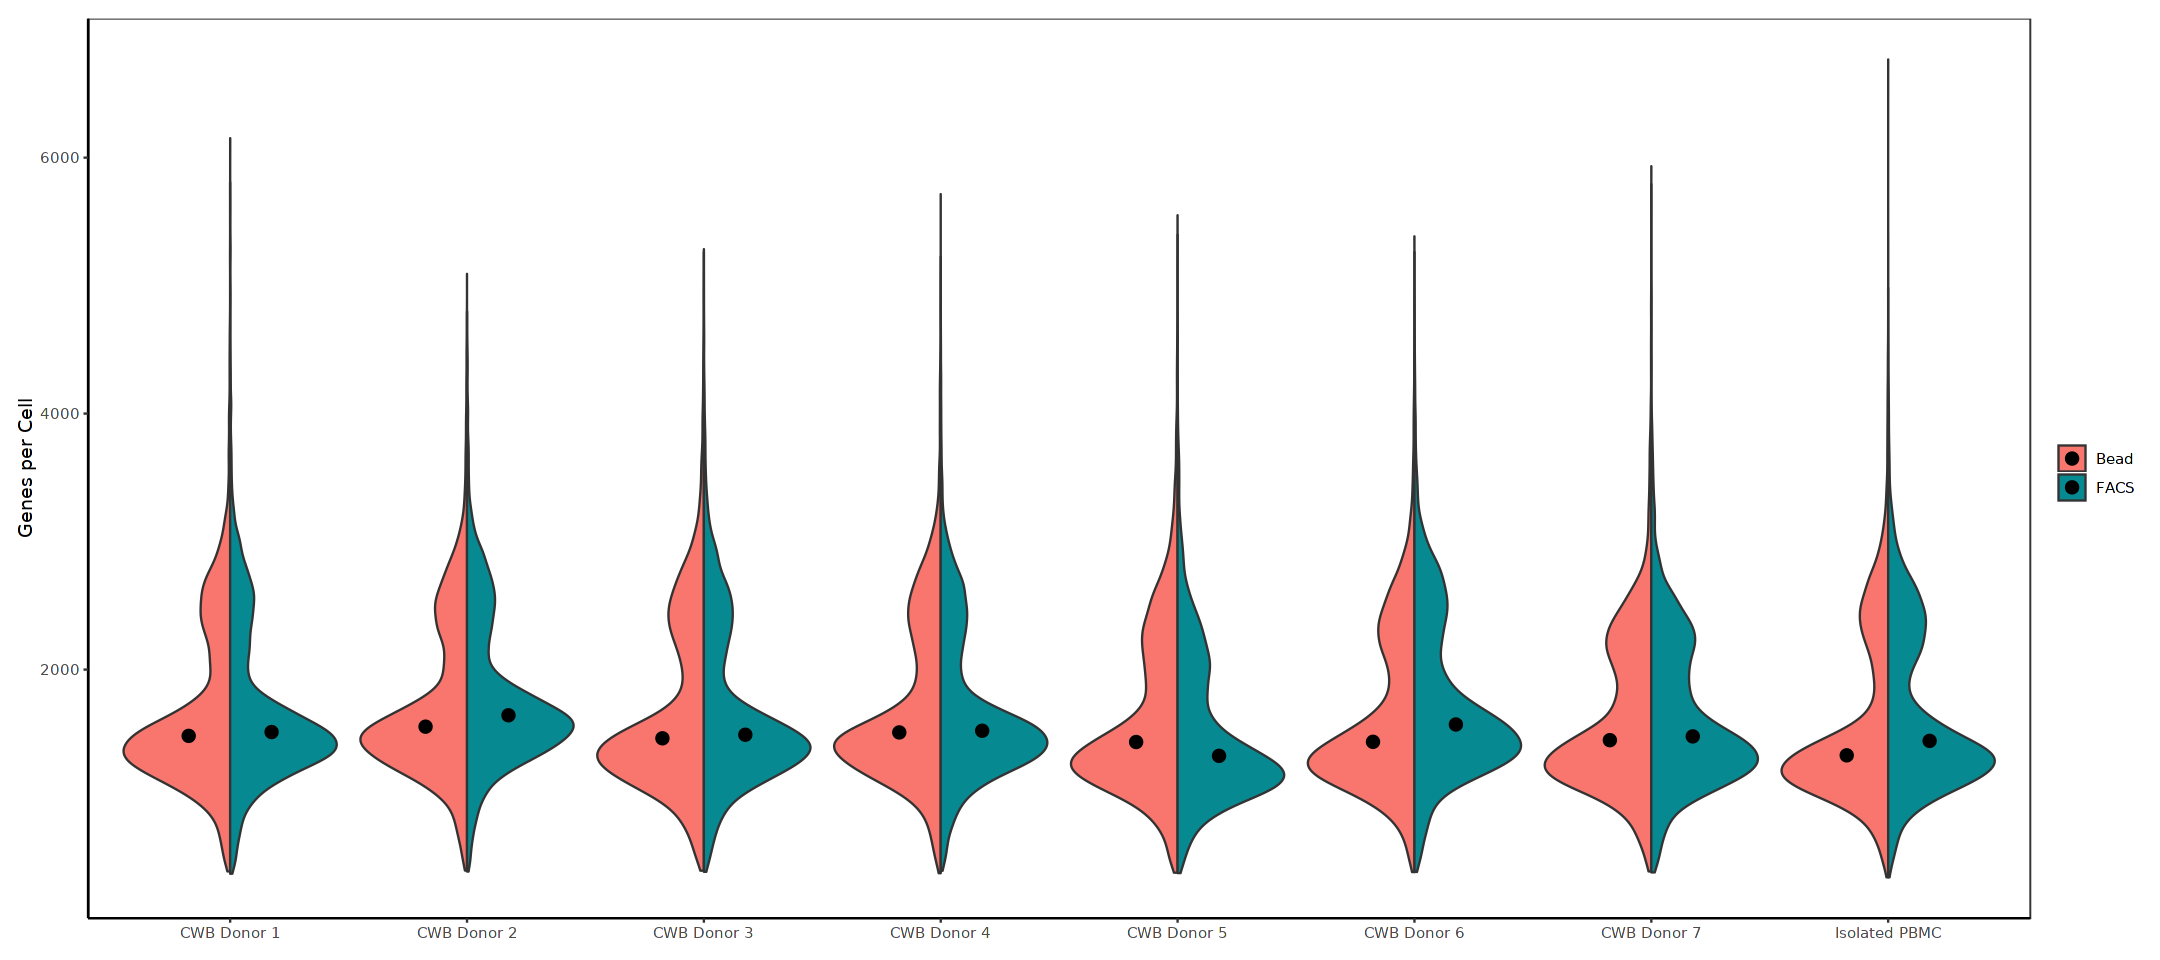

In [10]:
options(repr.plot.width=18,repr.plot.height=8) 

Idents(beadvfacs)<-'donor' # set the metadata column to be used in plotting, use whatever one makes sense

p <- VlnPlot(beadvfacs, features = "nFeature_RNA", ncol = 1,pt.size=0, split.by='method', split.plot=TRUE) +
     stat_summary(fun=median, geom="point", position = position_dodge(0.7),size=3, color="black") + 
     labs(x = NULL, y = "Genes per Cell", color = '10X Chemistry') +
     theme_bw() +    
     theme(axis.line = element_line(color='black'),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               text = element_text(family="sans"),
               axis.text.x = element_text(vjust = 0.7),
               plot.margin = margin(0.2,0.2,0.2,0.2, "cm"),
               plot.title = element_blank())

p

In [11]:
pdf("Fig3B_RNA_violins.pdf", width = 6, height = 2, onefile=TRUE)
p
invisible(dev.off())

### Bead vs FACS Level 1 UMAPS

In [12]:
umap_names_l1 <- c('CD4 T',
                   'CD8 T',
                   'other T',
                   'B',
                   'NK',
                   'Mono',
                   'DC'
                  )

In [13]:
Idents(beadvfacs) <- 'predicted.celltype.l1'
beadvfacs_sub <- subset(x = beadvfacs, idents = c('other'), invert = TRUE)

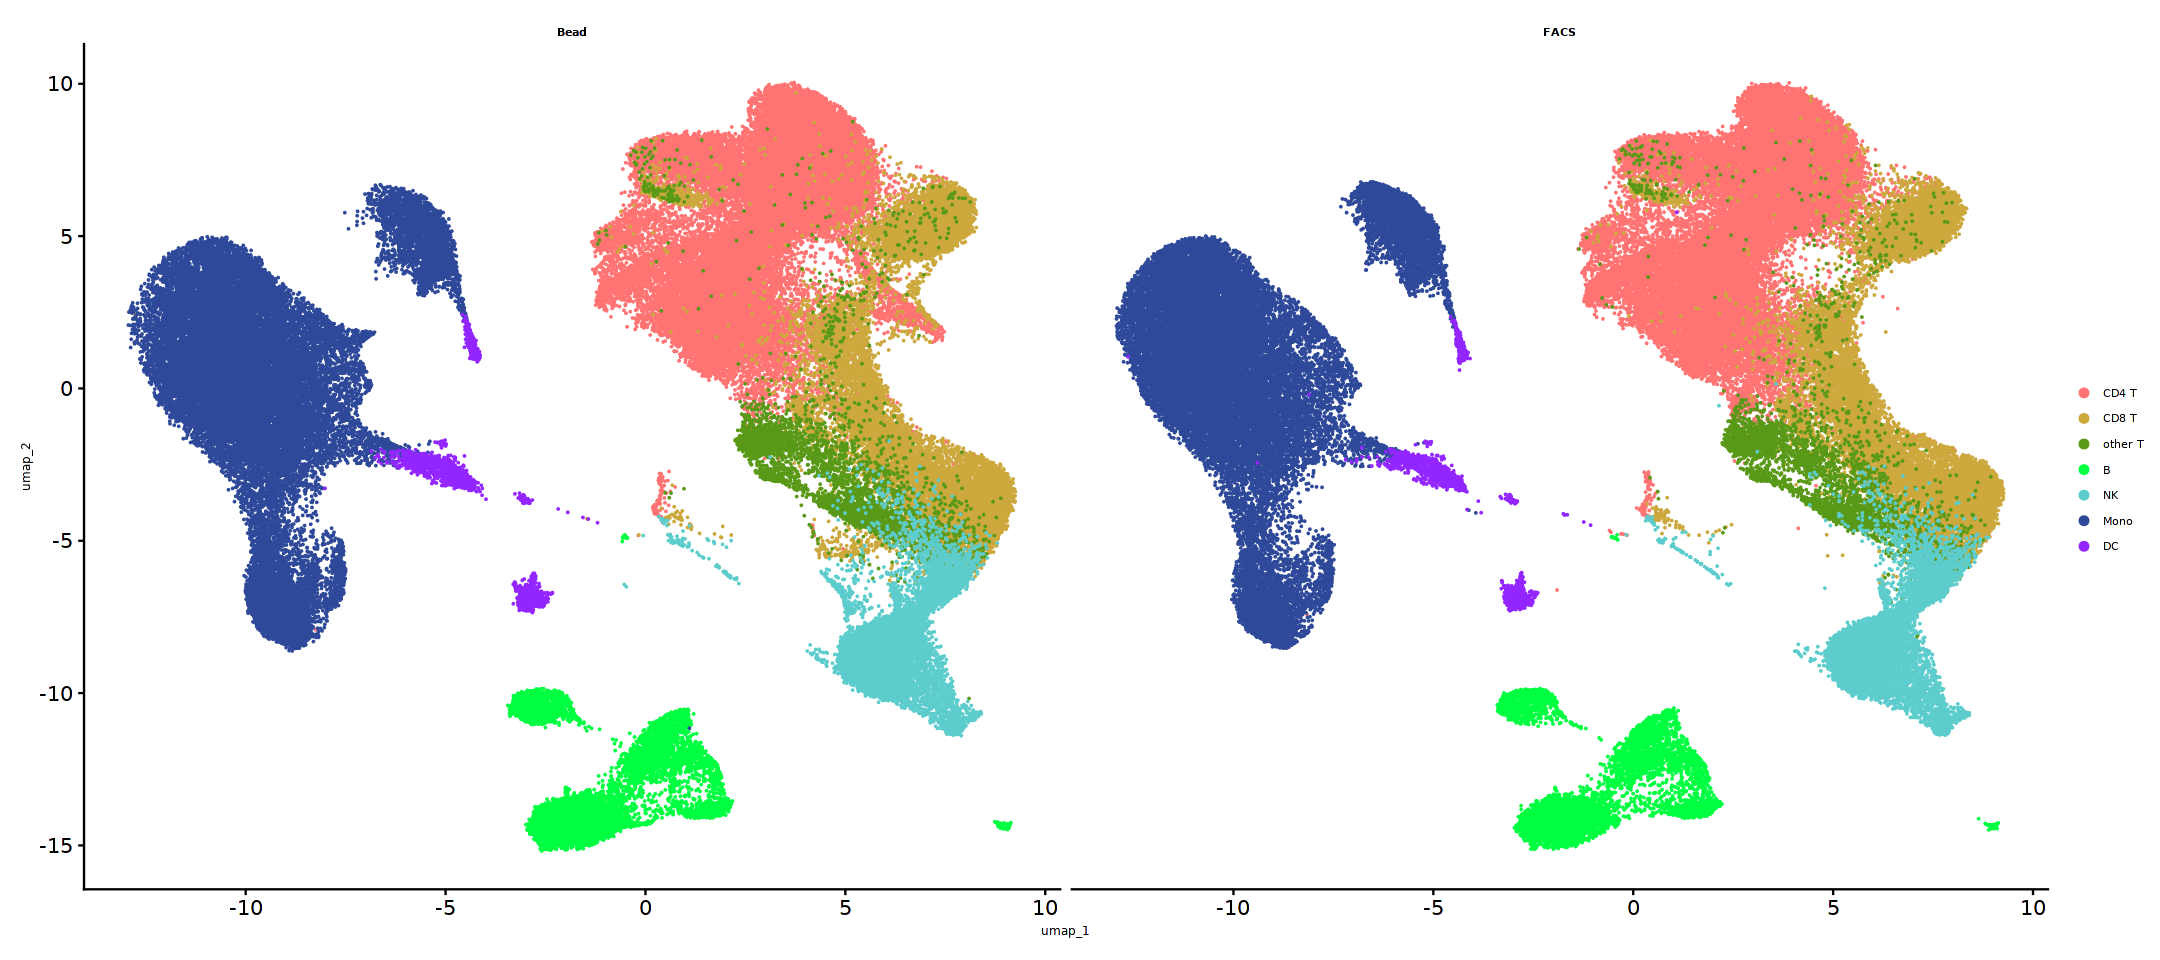

In [14]:
options(repr.plot.width=18,repr.plot.height=8)

p <- DimPlot_scCustom(seurat_object = beadvfacs_sub,             
                      # reduction = "umap", 
                      group.by = "predicted.celltype.l1", 
                      label = FALSE,
                      split.by='method',
                      split_seurat = TRUE,
                      # figure_plot = TRUE,
                      colors_use = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow"),
                      # pt.size=0.01,
                      order = rev(umap_names_l1)
                     ) + 
        ggtitle(NULL) +          
        theme(text = element_text(family="sans", size = 7),
                  legend.text=element_text(size=6),
                  plot.title = element_blank()) +
            guides(color = guide_legend(override.aes = list(size = 2)))

p

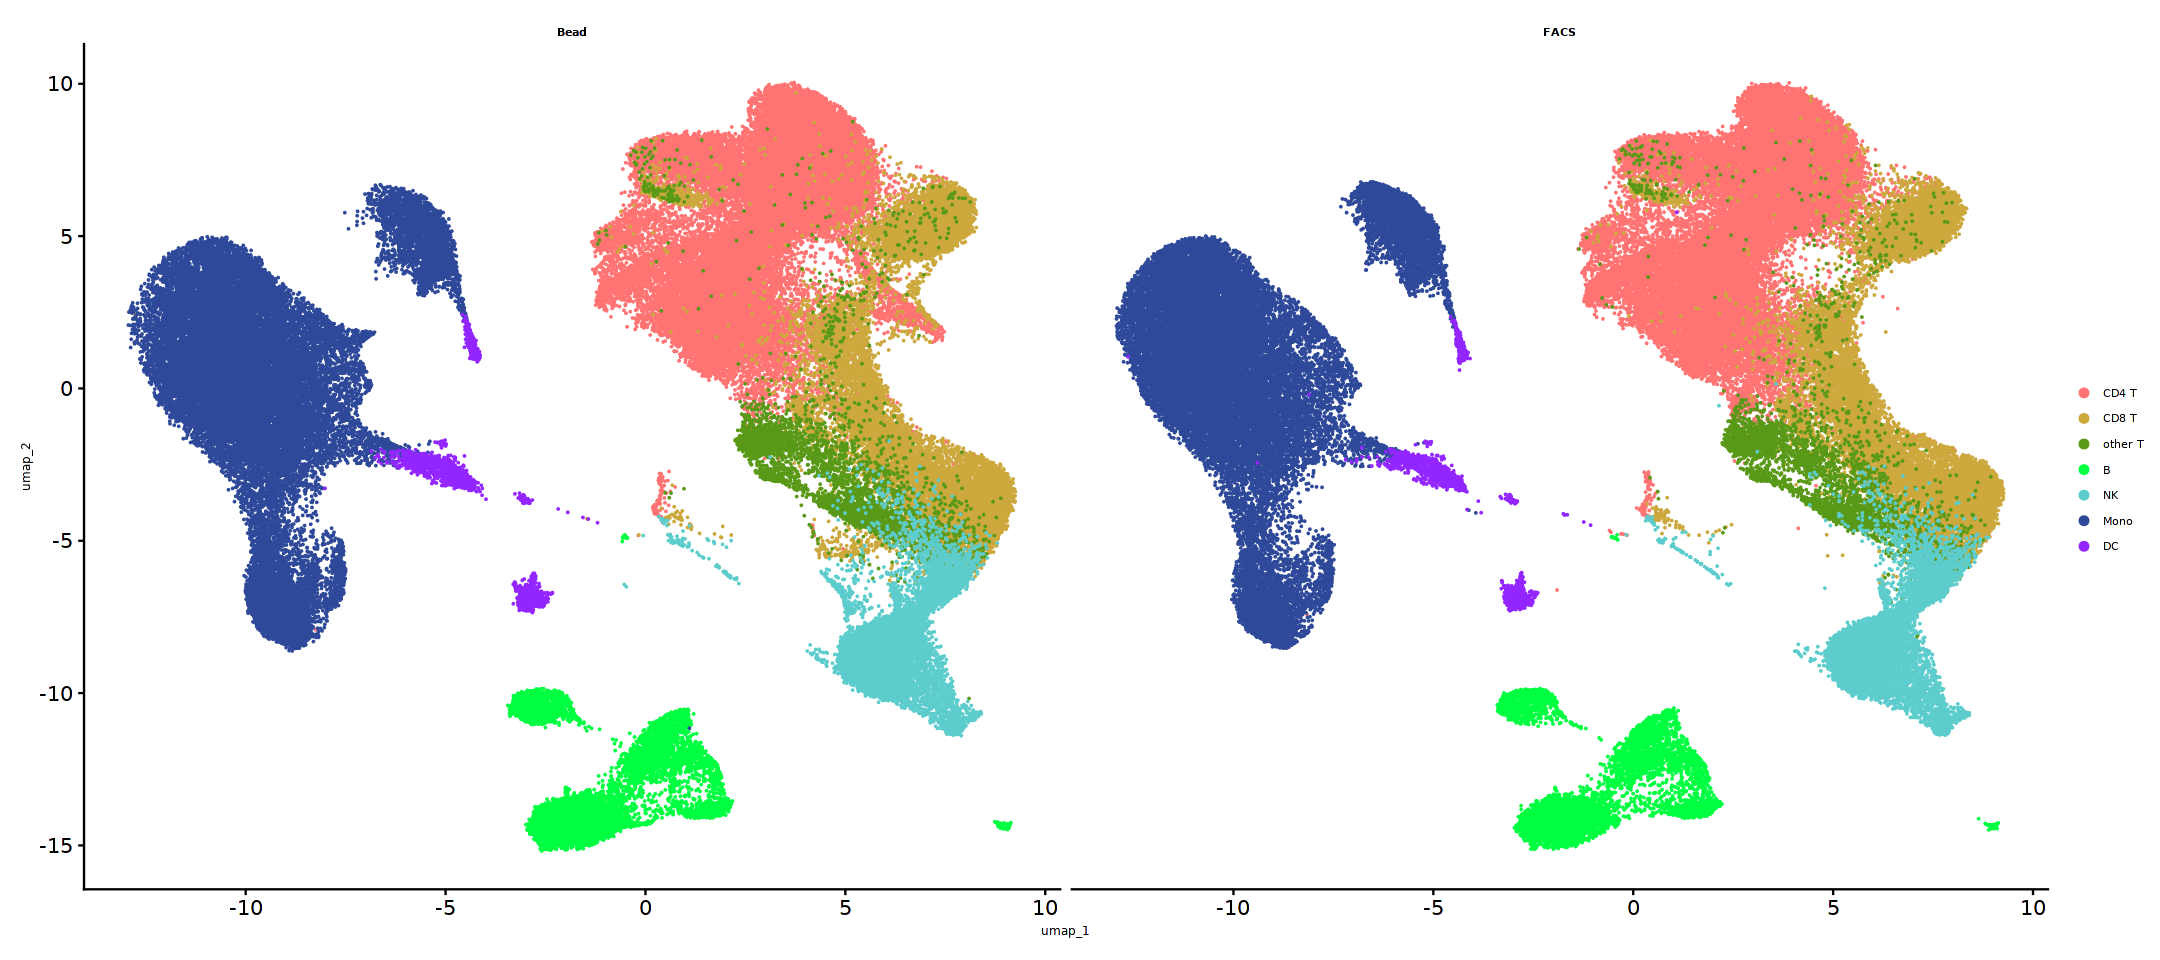

In [15]:
ggsave("Fig3_umap_l1.pdf", width = 14, height = 6, onefile=TRUE)
p
invisible(dev.off())

### Bead vs FACS Level 1 Correlation Plot

In [16]:
ct_beadvfacs <- celltype_prop_multi(beadvfacs,1,'method') %>% mutate(method=factor(method, levels=c("Bead","FACS")))

df <- subset(ct_beadvfacs, select = -c(n.x,n.y))
df <- filter(df, predicted.celltype.l1 != "other")
bead_df <- filter(df, method == "Bead") %>% rename(bead.perc=perc) %>% select(-method)
facs_df <- filter(df, method == "FACS") %>% rename(facs.perc=perc) %>% select(-method)
comp_df <- left_join(bead_df, facs_df) %>% relocate(orig.ident, .before = predicted.celltype.l1)
comp_df$predicted.celltype.l1 <- factor(comp_df$predicted.celltype.l1, levels = c("CD4 T", "CD8 T", "other T", "B", "NK", "Mono", "DC", "other"))

Joining with `by = join_by(predicted.celltype.l1, orig.ident)`


In [17]:
comp_df$orig.ident <- gsub('BL05012','CWB Donor 1', comp_df$orig.ident)
comp_df$orig.ident <- gsub('BL05013','CWB Donor 2', comp_df$orig.ident)
comp_df$orig.ident <- gsub('BL05044','CWB Donor 3', comp_df$orig.ident)
comp_df$orig.ident <- gsub('BL05045','CWB Donor 4', comp_df$orig.ident)
comp_df$orig.ident <- gsub('BL05729','CWB Donor 5', comp_df$orig.ident)
comp_df$orig.ident <- gsub('BL05730','CWB Donor 6', comp_df$orig.ident)
comp_df$orig.ident <- gsub('BL05731','CWB Donor 7', comp_df$orig.ident)
comp_df$orig.ident <- gsub('PB02183','Isolated PBMC', comp_df$orig.ident)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


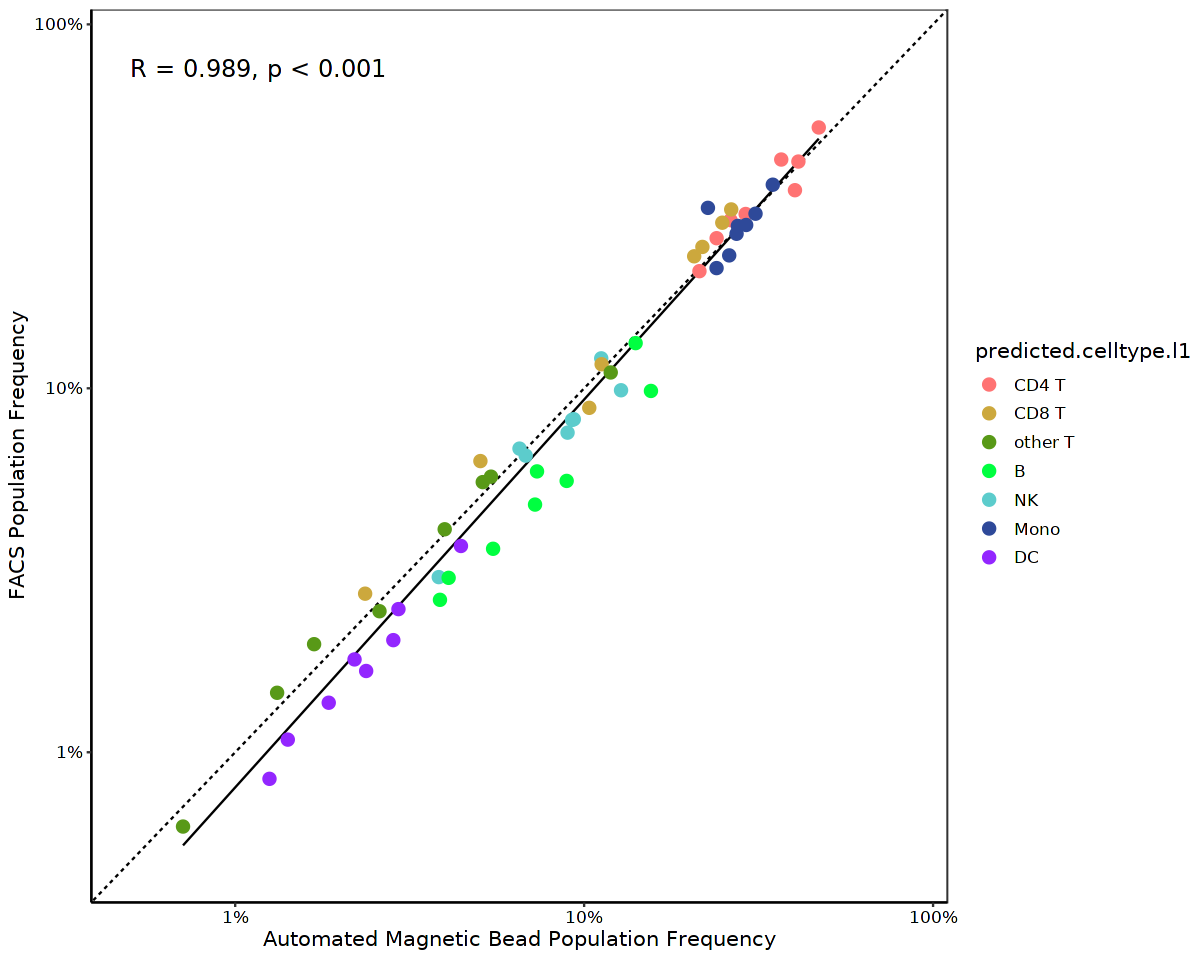

In [18]:
options(repr.plot.width=10,repr.plot.height=8) 


p <- ggplot(comp_df, aes(x = bead.perc, y = facs.perc, color = predicted.celltype.l1, 
                         # shape = orig.ident
                        )) +
     # scale_colour_manual(values = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow")) +
     geom_abline(slope = 1, linetype = 'dashed', size = 0.5) +
     geom_smooth(inherit.aes = FALSE, aes(x = bead.perc, y = facs.perc), method='lm', se = FALSE, color = "black", linewidth = 0.5) +
     geom_point(size = 3) + 
     scale_color_manual(values = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow")) +
     scale_x_log10(labels = scales::percent, limits = c(0.005,0.85)) +
     scale_y_log10(labels = scales::percent, limits = c(0.005,0.85)) + 
     stat_cor(inherit.aes = FALSE, aes(x = bead.perc, y = facs.perc), size = 5, 
              r.accuracy = 0.001, p.accuracy = 0.001, show.legend = FALSE) +
     xlab("Automated Magnetic Bead Population Frequency") +
     ylab("FACS Population Frequency") +
     scale_shape_manual(values=c(16,15,17,18,1,0,2,5))+
     theme_bw() +    
     theme(
           axis.line = element_line(color='black'),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank(),
           axis.text.x=element_text(colour="black"),
           axis.text.y=element_text(colour="black"),
           text = element_text(family="sans", size = 12),
           plot.margin = margin(0.2,0.2,0.2,0.2, "cm"),
               # plot.title = element_blank()
          )

p

In [19]:
pdf("Fig3_corr_plot.pdf", width = 6, height = 4, onefile=TRUE)
p
invisible(dev.off())

`geom_smooth()` using formula = 'y ~ x'


### Bead vs FACS Heatmap

In [20]:
Idents(beadvfacs) <- 'predicted.celltype.l1'
DefaultAssay(beadvfacs) <- 'RNA'

In [21]:
beadvfacs$sample2 <- beadvfacs$donor

beadvfacs$sample2 <- gsub('BL05012','CWB Donor 1', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('BL05013','CWB Donor 2', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('BL05044','CWB Donor 3', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('BL05045','CWB Donor 4', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('BL05729','CWB Donor 5', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('BL05730','CWB Donor 6', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('BL05731','CWB Donor 7', beadvfacs$sample2)
beadvfacs$sample2 <- gsub('PB02183','PBMC', beadvfacs$sample2)

In [22]:
ct.markers <- FindAllMarkers(beadvfacs, logfc.threshold = 1)
ct.markers <- ct.markers[ct.markers$p_val_adj < 0.05 , ]

CD4.T.markers   <- ct.markers[ct.markers$cluster == 'CD4 T' , ] %>% arrange(desc(avg_log2FC))
CD8.T.markers   <- ct.markers[ct.markers$cluster == 'CD8 T' , ] %>% arrange(desc(avg_log2FC))
B.markers       <- ct.markers[ct.markers$cluster == 'B' , ] %>% arrange(desc(avg_log2FC))
NK.markers      <- ct.markers[ct.markers$cluster == 'NK' , ] %>% arrange(desc(avg_log2FC))
DC.markers      <- ct.markers[ct.markers$cluster == 'DC' , ] %>% arrange(desc(avg_log2FC))
Mono.markers    <- ct.markers[ct.markers$cluster == 'Mono' , ] %>% arrange(desc(avg_log2FC))
other.T.markers <- ct.markers[ct.markers$cluster == 'other T' , ] %>% arrange(desc(avg_log2FC))

CD4.T.markers.top25   <- head(CD4.T.markers, 25)
CD8.T.markers.top25   <- head(CD8.T.markers, 25)
B.markers.top25       <- head(B.markers, 25)
NK.markers.top25      <- head(NK.markers, 25)
DC.markers.top25      <- head(DC.markers, 25)
Mono.markers.top25    <- head(Mono.markers, 25)
other.T.markers.top25 <- head(other.T.markers, 25)

top.markers <- c(
    CD4.T.markers.top25$gene,
    CD8.T.markers.top25$gene,
    B.markers.top25$gene,
    NK.markers.top25$gene,
    DC.markers.top25$gene,
    Mono.markers.top25$gene,
    other.T.markers.top25$gene
)

Calculating cluster CD4 T

Calculating cluster B

Calculating cluster Mono

Calculating cluster NK

Calculating cluster other T

Calculating cluster CD8 T

Calculating cluster DC

Calculating cluster other



In [23]:
beadvfacs$sample2_tech <- paste0(beadvfacs$sample2, '_', beadvfacs$method)
Idents(beadvfacs) <- 'sample2_tech'

mtx <- beadvfacs %>% AverageExpression(group.by = 'sample2_tech', assay = 'RNA', layer = 'data') #$RNA %>% as.data.frame()
mtx <- as.data.frame(mtx$RNA)
mtx <- mtx[rowSums(mtx)>0,]

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.


In [24]:
d1_cor <- round(cor(mtx[,1], mtx[,2], method = "pearson"),3)
d2_cor <- round(cor(mtx[,3], mtx[,4], method = "pearson"),3)
d3_cor <- round(cor(mtx[,5], mtx[,6], method = "pearson"),3)
d4_cor <- round(cor(mtx[,7], mtx[,8], method = "pearson"),3)
d5_cor <- round(cor(mtx[,9], mtx[,10], method = "pearson"),3)
d6_cor <- round(cor(mtx[,11], mtx[,12], method = "pearson"),3)
d7_cor <- round(cor(mtx[,13], mtx[,14], method = "pearson"),3)
pbmc_cor <- round(cor(mtx[,15], mtx[,16], method = "pearson"),3)

cor_list <- c(d1_cor,d1_cor,d2_cor,d2_cor,d3_cor,d3_cor,d4_cor,d4_cor,d5_cor,d5_cor,d6_cor,d6_cor,d7_cor,d7_cor,pbmc_cor,pbmc_cor)

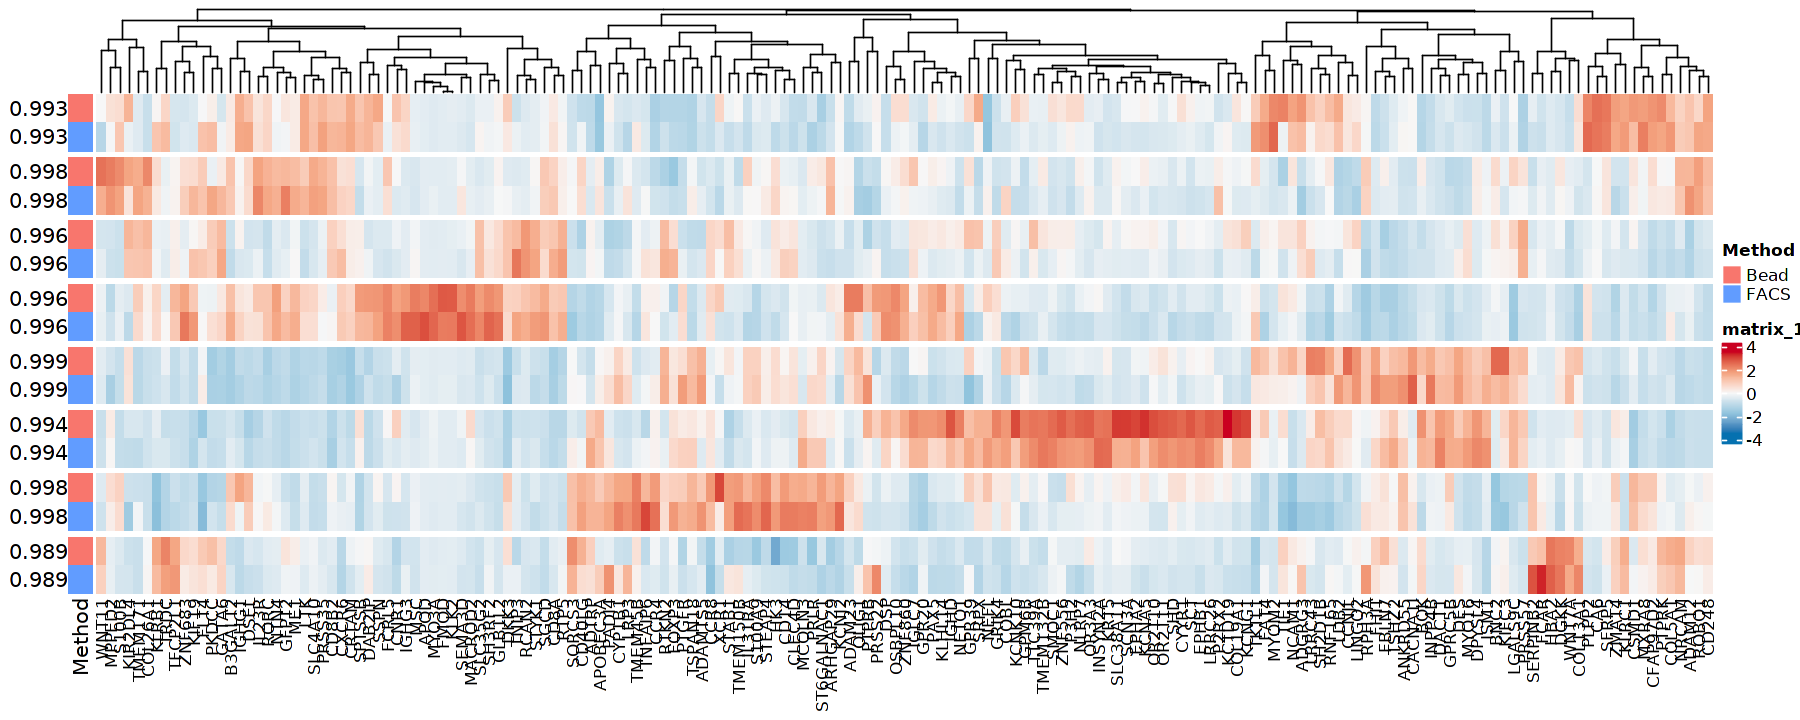

In [25]:
options(repr.plot.height=6, repr.plot.width=15)

my_sample_col <- data.frame(Method = rep(c("Bead","FACS"), 8))

row.names(my_sample_col) <- colnames(mtx)
my_sample_col$Method <- factor(my_sample_col$Method, levels = c("Bead","FACS"))

my_colour = list(
    Method = c(Bead = red,FACS = blue))

ha = rowAnnotation(
       Correlation = anno_text(cor_list, gp = gpar(fontsize = 12)),
       Method = my_sample_col$Method,
       col = list(
            Method = c(Bead = red,FACS = blue)),
       gap = unit(2, "mm")
       )

p <- as.matrix(mtx[rownames(mtx) %in% top.markers, ]) %>% 
    t() %>% scale() %>%
    ComplexHeatmap::pheatmap(
        scale='column',
        cluster_rows = FALSE,
        color = rev(RColorBrewer::brewer.pal(name = "RdBu", n = 5)),
        left_annotation = ha,
        fontsize = 10,
        gaps_row = seq(2,14,by=2),
        # row_split = my_sample_col$Cell_Type,
        show_rownames = FALSE,
     )

p

In [26]:
pdf("Fig3_heatmap.pdf", width = 15, height = 6, onefile=TRUE)
p
invisible(dev.off())

In [28]:

cor.test(comp_df$bead.perc, comp_df$facs.perc, method = "pearson")


	Pearson's product-moment correlation

data:  comp_df$bead.perc and comp_df$facs.perc
t = 42.218, df = 54, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9747538 0.9913276
sample estimates:
      cor 
0.9851871 
